<a href="https://colab.research.google.com/github/Das-Sujoy/Telecom-Churn-Analysis/blob/main/Sujoy_Das_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**Team members:**

*   Sujoy Das
*   Debatra Das
*   Subhankar Roy
*   Anupam Ghosh





## **Objective of our Project:**
*   Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e 'leave a company' based on their usage of the service.
*   So the main objective of our project is to detect the key factors responsible for customer churn and find out the ways to ensure customer retention.



## Importing the libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Load and read the data
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Project/EDA Capstone Project/Telecom Churn.csv')

# **Basic Analysis**


In [7]:
#top 5 rows of the dataset
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
#Bottom 5 rows of the dataset
dataset.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [9]:
dataset.shape

(3333, 20)

**There are 3333 rows and 20 columns in above dataset.**

In [10]:
#part of data summary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Exploratory Data Analysis**

In [11]:
# Statistical Analysis
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
#Checking for null values
dataset.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

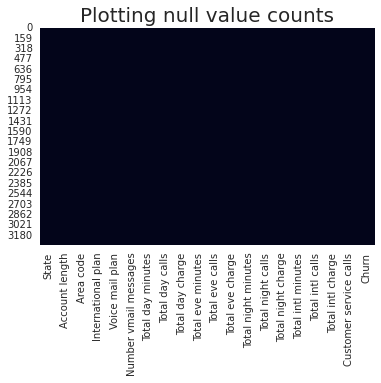

In [13]:
#visualization of null values Checking 
sns.heatmap(dataset.isnull(),cbar=False)
plt.title('Plotting null value counts',fontsize=20)
plt.show()

**There is no null value present in our dataset**

In [14]:
# Checking Duplicate Values
len(dataset[dataset.duplicated()])

0

**There is no Duplicate value present in our dataset**

we see that the data consists of cleaned customer activity data.



In [15]:
#printing all The columns
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [16]:
#Unique value counts
dataset.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


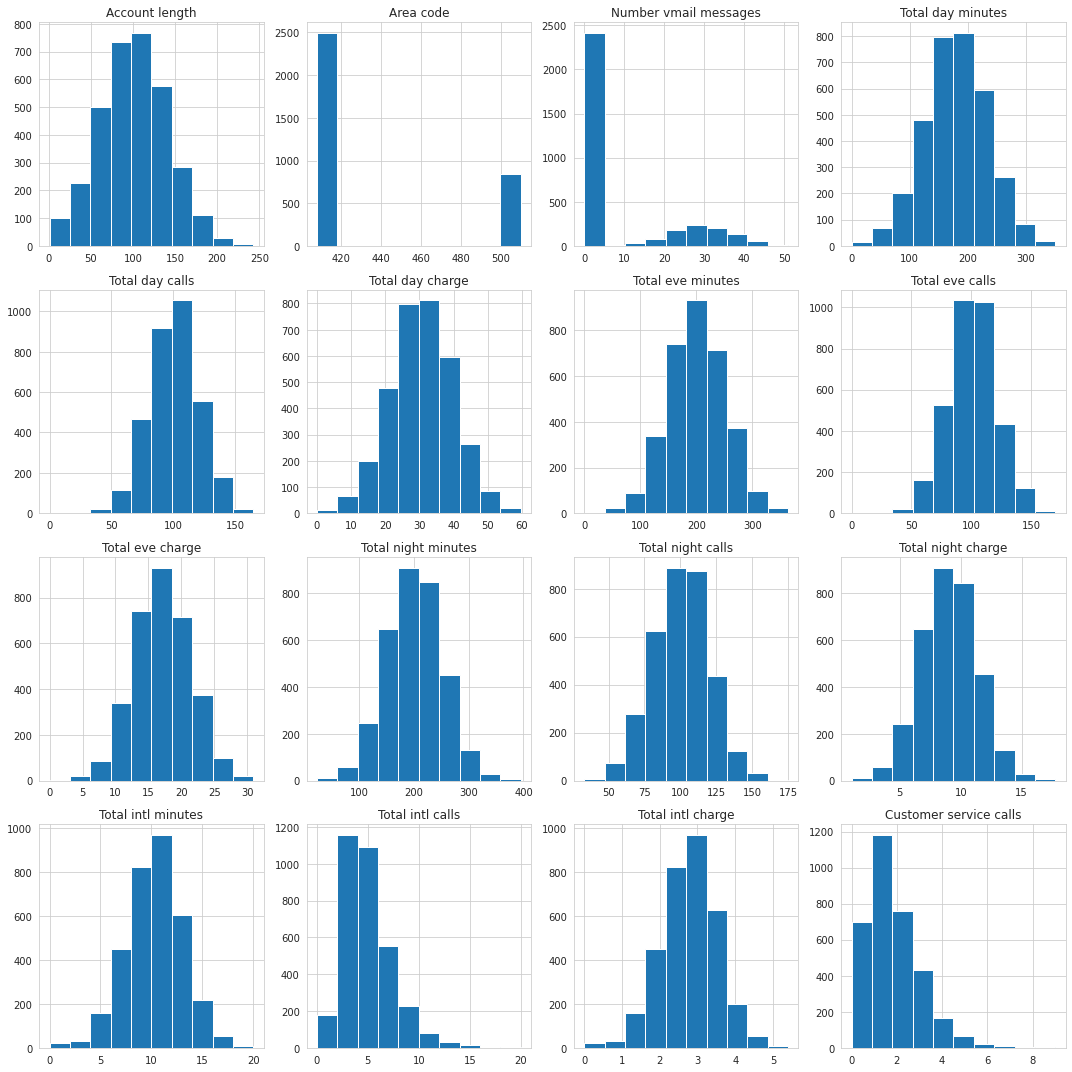

In [17]:
# Freq distribution of all columns
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(dataset,ax=ax)
plt.tight_layout();
plt.show()

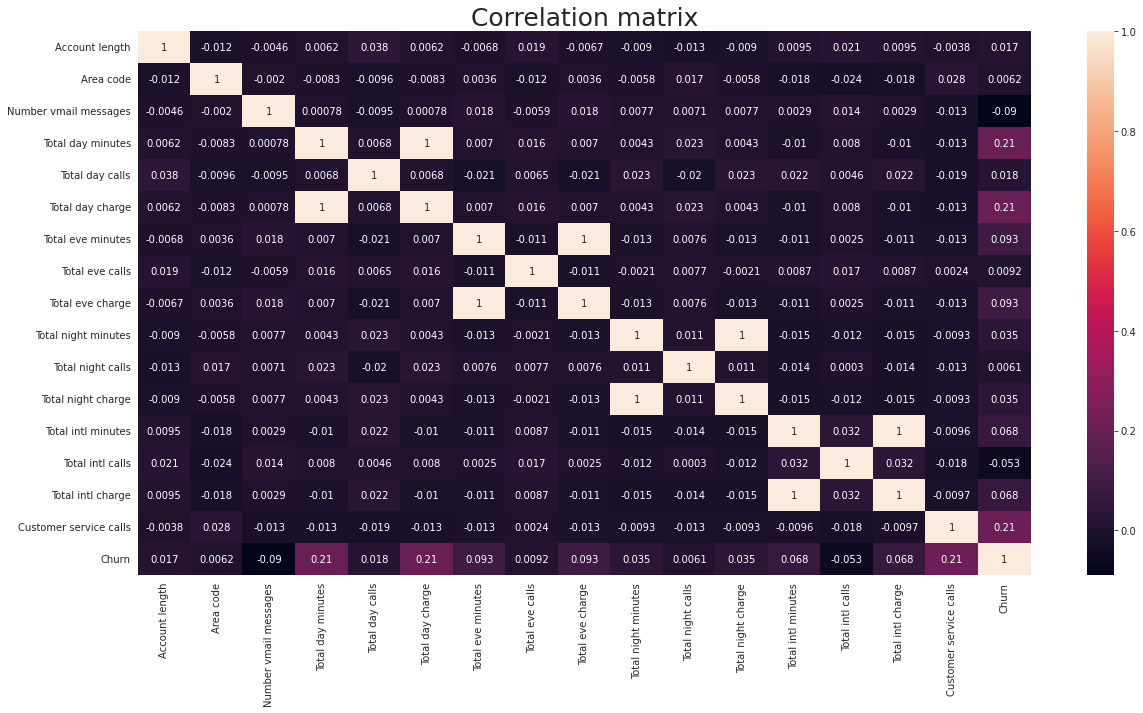

In [18]:
#Correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(dataset.corr(),annot = True)
plt.title("Correlation matrix",fontsize= 25)
plt.show()

In [19]:
#Correlation w.r.t. Churn column
dataset.corr()['Churn'].sort_values(ascending = False)

Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64

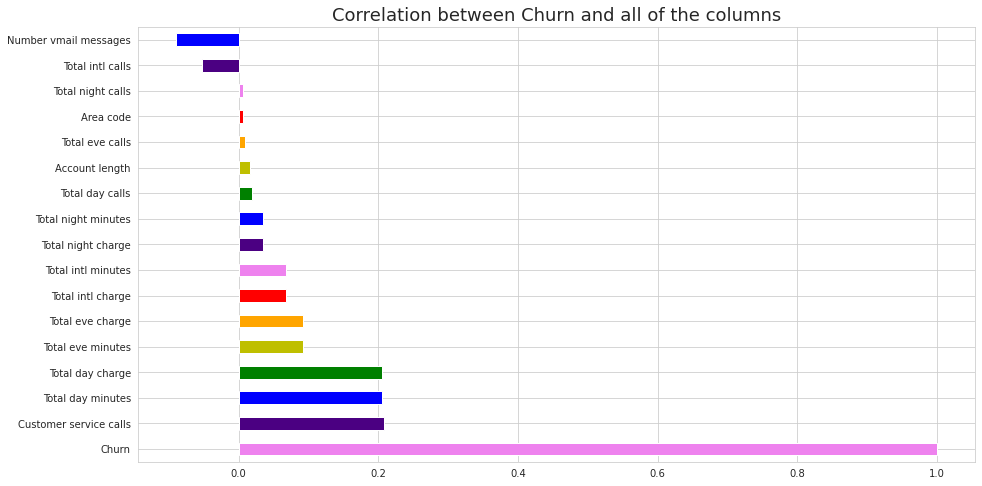

In [20]:
#Correlation between Churn and all of the columns
plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='barh',color = ['violet','indigo','b','g','y','orange','r'])
plt.title('Correlation between Churn and all of the columns',fontsize=18)
plt.show()

In [21]:
#Churn and non-churn value counts
dataset.Churn.value_counts().rename('Count').reset_index()

,index,Count
0,False,2850
1,True,483


In [22]:
#Churn and non-churn percentage
Total_Churn_percentage=(dataset['Churn'].value_counts(normalize=True)).mul(100).round(2).rename('percentage').reset_index()
Total_Churn_percentage

,index,percentage
0,False,85.51
1,True,14.49


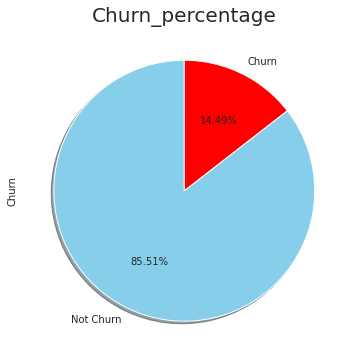

In [23]:
#Visualization
dataset ['Churn'].value_counts().plot(kind='pie', figsize=(20,6),autopct="%1.2f%%",startangle=90, shadow= 'true',colors=['skyblue','red'],
                                      labels=['Not Churn','Churn'],)
plt.title('Churn_percentage',fontsize=20)
plt.show()

Number of Churn customers = 483 ~ (14.49%)

Number of non-Churn  customers = 2850 ~ (85.51%)




##**Column wise Analysis**

###**State**

In [24]:
dataset['State'].nunique(0)

51

In [25]:
#To find which of state are more churn rate
state_churn=dataset.groupby(['State'])['Churn'].mean().mul(100).sort_values(ascending = False).rename('Percentage').reset_index()
state_churn.head(10)

,State,Percentage
0,NJ,26.470588
1,CA,26.470588
2,TX,25.000000
3,MD,24.285714
4,SC,23.333333
5,MI,21.917808
6,MS,21.538462
7,NV,21.212121
8,WA,21.212121
9,ME,20.967742


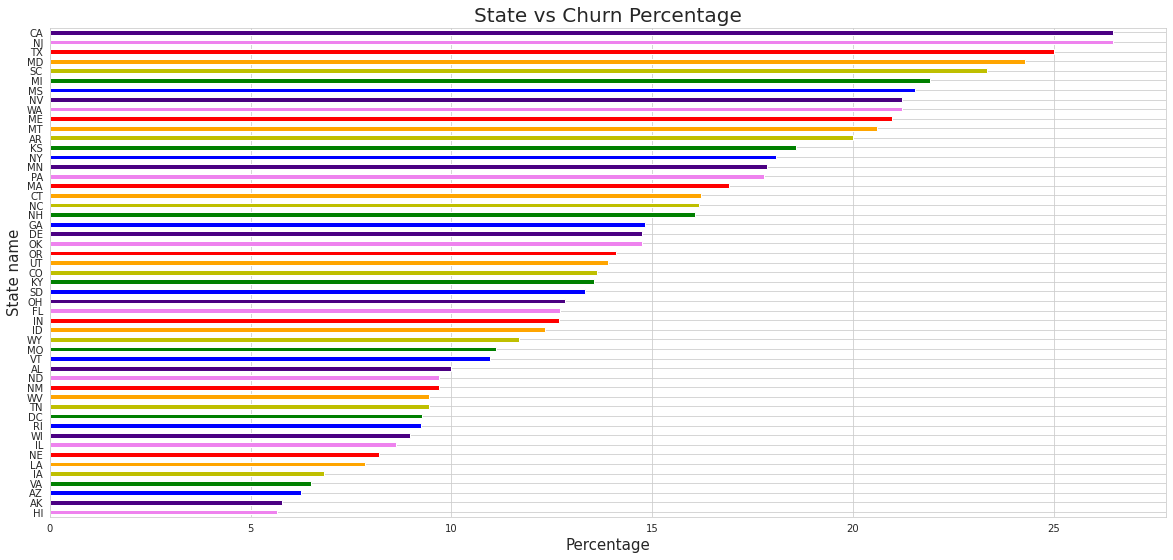

In [26]:
#Visualization
plt.rcParams['figure.figsize'] = (20,9)
dataset.groupby(['State'])['Churn'].mean().mul(100).sort_values(ascending = True).plot(kind='barh',color=['violet','indigo','b','g','y','orange','r'])
plt.title('State vs Churn Percentage',fontsize=20)
plt.xlabel('Percentage',fontsize=15)
plt.ylabel('State name',fontsize=15)
plt.show()

There are 51 state who have different churn rates .

CA, NJ, TX, MD, SC are the ones who have higher churn rate (more then 23%) which is even more than 50% of average churn rate (14.49%).


In [27]:
dataset.groupby(['State'])['Churn'].sum().sort_values(ascending = False).head(10)

State
NJ    18
TX    18
MD    17
MI    16
MN    15
NY    15
MT    14
NV    14
MS    14
SC    14
Name: Churn, dtype: int64

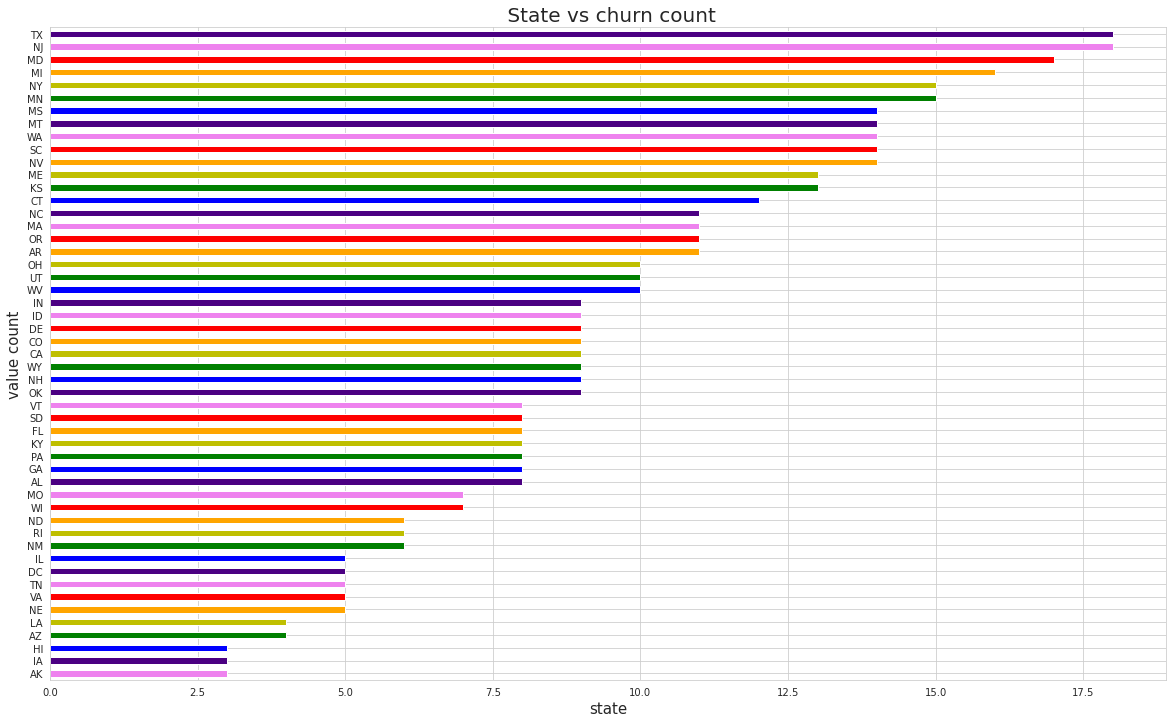

In [28]:
#Visualization
plt.rcParams['figure.figsize'] = (20, 12)
(dataset.groupby(['State'])['Churn'].sum()).sort_values(ascending = True).plot(kind='barh',color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State vs churn count", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('value count', fontsize = 15)
plt.show()

  Out of 51 unique states, NJ ,TX , MD, MI are the ones with higher churn count more then 15.

###**International plan**

In [29]:
dataset['International plan'].value_counts(normalize=True)*100

No     90.309031
Yes     9.690969
Name: International plan, dtype: float64

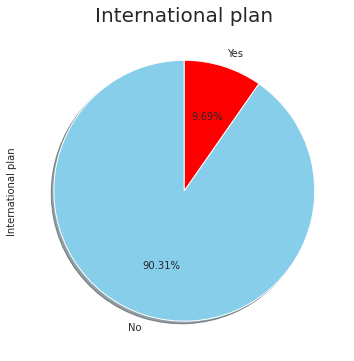

In [30]:
#Visualization
dataset['International plan'].value_counts().plot(kind='pie',figsize=(20,6), autopct="%1.2f%%",startangle=90, shadow=True,labels=['No','Yes'],
                               colors=['skyblue','red'],)
plt.title('International plan',fontsize=20)
plt.show()

In [31]:
print(dataset.groupby('International plan')['Churn'].mean()*100)

International plan
No     11.495017
Yes    42.414861
Name: Churn, dtype: float64


In [32]:
dataset.groupby('International plan')['Churn'].value_counts()

International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64

In [33]:
Churn_percentage=(dataset.groupby('International plan')['Churn'].value_counts(normalize=True).mul(100)).rename('Percentage').reset_index()
Churn_percentage

,International plan,Churn,Percentage
0,No,False,88.504983
1,No,True,11.495017
2,Yes,False,57.585139
3,Yes,True,42.414861


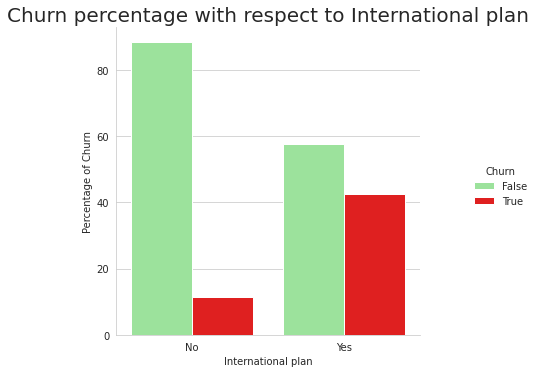

In [34]:
#Visualization
sns.catplot(x='International plan',y='Percentage',hue='Churn',kind='bar',data=Churn_percentage,palette=sns.color_palette(['lightgreen', 'r']))
plt.title('Churn percentage with respect to International plan',fontsize=20)
plt.ylabel('Percentage of Churn')
plt.show()

In [35]:
#creat a new column intl call charge
dataset['intl call charge']=(dataset['Total intl charge']/dataset['Total intl minutes']).round(2)
dataset.groupby('International plan')['intl call charge'].mean().reset_index()

,International plan,intl call charge
0,No,0.27
1,Yes,0.27


CONCLUSION:

90.31% of total customers don't have an international plan whereas 9.69% have one.

Among those who have an international plan 42.41 % people churn.

Whereas among those who don't have a international plan only 11.4 % people churn.

Customers with the International Plan tend to churn more frequently.

The reason why people having international plan might be leaving is that they are paying same amount of money for international calls as for those customers who don't have a international plan. Hence they are not getting any benefits for having an international plan so they might be unhappy.


### **VOICE MAIL PLAN**

In [36]:
dataset['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

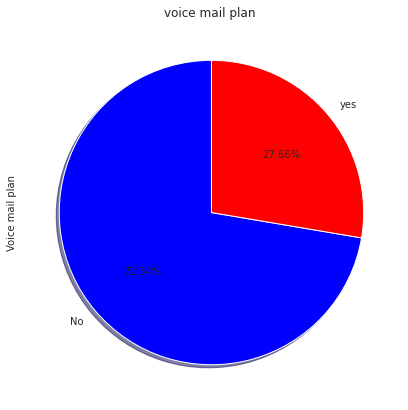

In [37]:
#Visualization
dataset['Voice mail plan'].value_counts().plot(kind='pie',figsize=(15,7),autopct=('%1.2f%%'),startangle=90,shadow=('true'), colors=['b','red'],labels=['No','yes'])
plt.title('voice mail plan ')
plt.show()

In [38]:
voice_mail=dataset.groupby('Voice mail plan')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
voice_mail

,Voice mail plan,Churn,Percentage
0,No,False,83.284944
1,No,True,16.715056
2,Yes,False,91.323210
3,Yes,True,8.676790


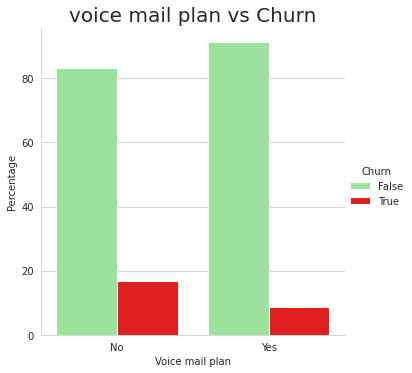

In [39]:
#Visualization
sns.catplot(x='Voice mail plan',y='Percentage',hue='Churn', kind='bar',data=voice_mail,aspect=1,palette=sns.color_palette(['lightgreen', 'r']))

plt.title('voice mail plan vs Churn',fontsize=20)
plt.show()

In [40]:
#Creat a subset of dataset
subscription_canceled=dataset[dataset['Churn']==True]

In [41]:
subscription_canceled['Voice mail plan'].value_counts().reset_index()

,index,Voice mail plan
0,No,403
1,Yes,80


In [42]:
Churn_percentage_2=subscription_canceled['Voice mail plan'].value_counts(normalize=True).mul(100).round(2).rename('percentage').reset_index()
Churn_percentage_2

,index,percentage
0,No,83.44
1,Yes,16.56


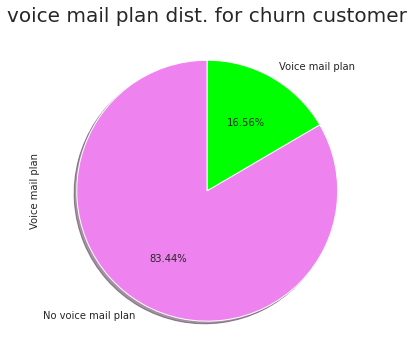

In [43]:
#Visualization
subscription_canceled['Voice mail plan'].value_counts().plot(kind='pie', figsize=(15,6),autopct="%1.2f%%",startangle=90,shadow='true',colors=['violet' ,'lime'], labels=['No voice mail plan','Voice mail plan'])
plt.title('voice mail plan dist. for churn customer',fontsize=20)
plt.show()

2411 don't have a voice mail plan

922 have a voice mail plan

Out of total churned customers, 83.44% did not have an active voice mail plan. Therefore the customers, who did not opt for voice mail plan, are more prone to churn.

### **Area code**

In [44]:
print(dataset['Area code'].value_counts())

415    1655
510     840
408     838
Name: Area code, dtype: int64


In [45]:
dataset.groupby(['Area code'])['Churn'].value_counts().rename('count').reset_index()

,Area code,Churn,count
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


In [46]:
dataset.groupby('Area code')['Churn'].mean().mul(100).rename('Percentage').reset_index()

,Area code,Percentage
0,408,14.558473
1,415,14.259819
2,510,14.880952


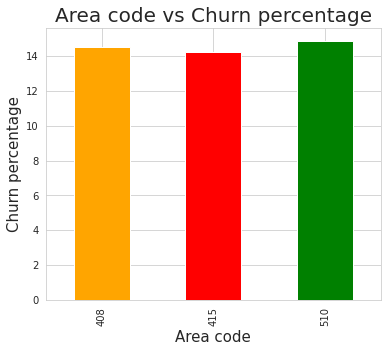

In [55]:
#Visualization

(dataset.groupby('Area code')['Churn'].mean().mul(100)).plot.bar( color=['orange','red','g'])

plt.rcParams['figure.figsize'] = (6, 5)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('Churn percentage', fontsize = 15)
plt.title('Area code vs Churn percentage',fontsize=20)
plt.show()

Since all three area code have around 14% churn rate, we can conclude area code is not an influential parameter.

### **OVERALL CALLS**

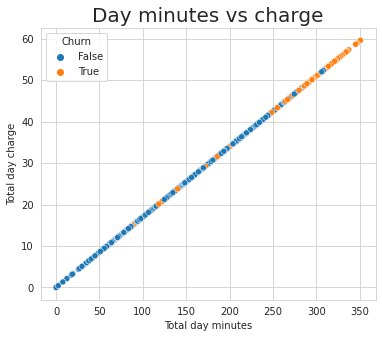

In [48]:
#Visualization
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset)
plt.title('Day minutes vs charge',fontsize=20)
plt.show()

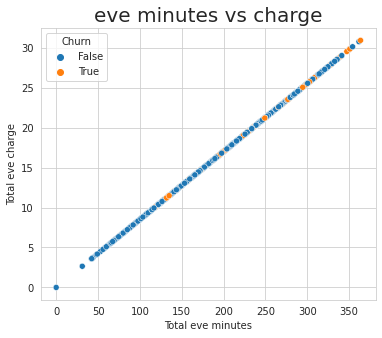

In [49]:
#Visualization
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=dataset)
plt.title('eve minutes vs charge',fontsize=20)
plt.show()

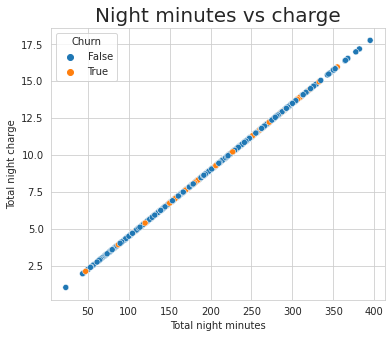

In [50]:
#Visualization
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=dataset)
plt.title('Night minutes vs charge',fontsize=20)
plt.show()

From the above three scatter plots, we can see total minutes and total charge are highly positively correlated(almost 1). so we can drop one redundant feature(Total Charge) and carry out our analysis on the feature- Total minutes.

In [51]:
Total_minutes_analysis = ['Total day minutes', 'Total eve minutes','Total night minutes']
dataset.groupby(['Churn'])[Total_minutes_analysis].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

We can see that the average minutes of calls for the customers, who cancelled the subscription are more then 200 minutes.

**Suggestion:** To retain those customers, The telecom company has to come up with some special offer for those customers who spend more then 200 minutes.

### **CUSTOMER SERVICE CALL**

In [52]:
#customer service calls count 
dataset['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [53]:
Churn_percentage_3=dataset.groupby('Customer service calls')['Churn'].value_counts(normalize=True).mul(100).round(2).rename('percentage').reset_index()
Churn_percentage_3

,Customer service calls,Churn,percentage
0,0,False,86.80
1,0,True,13.20
2,1,False,89.67
3,1,True,10.33
4,2,False,88.54
5,2,True,11.46
6,3,False,89.74
7,3,True,10.26
8,4,False,54.22
9,4,True,45.78


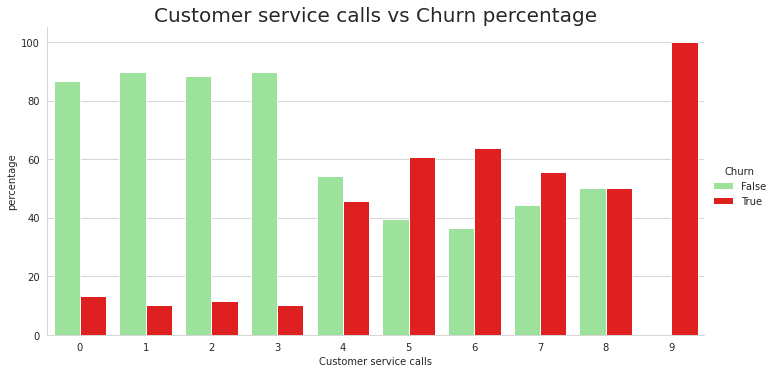

In [54]:
#Visualization
sns.catplot(x='Customer service calls',y='percentage',hue='Churn', kind='bar',data=Churn_percentage_3,aspect=2,palette=sns.color_palette(['lightgreen', 'r']))
plt.title('Customer service calls vs Churn percentage',fontsize=20)
plt.show()

**Observation:** The service calls of customers varies from 0 to 9 .

Those customers who make more service calls, are very dissatisfied with their current service provider and likely to churn.

We can see from graph ,for the customers who have more then 4 service calls,  probability of leaving is more then 50 %(Aprx.).

**Suggestion:** Hence for the customers who make more then 4 service calls, the queries should be resolved immediately and they should be given better service so that they won't leave the company.